In [1]:
import pandas as pd

In [7]:
import numpy as np

In [3]:
df = pd.read_csv("Sentimentdataset.csv")

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
df.head

<bound method NDFrame.head of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
5               5           5   
6               6           6   
7               7           7   
8               8           8   
9               9           9   
10             10          10   
11             11          11   
12             12          12   
13             13          13   
14             14          14   
15             15          15   
16             16          16   
17             17          17   
18             18          18   
19             19          19   
20             20          20   
21             21          21   
22             22          22   
23             23          23   
24             24          24   
25             25          25   
26             27          28   
27             28          29   
28           

In [21]:
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

In [23]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [29]:
df["Country"]= df["Country"].str.strip()

In [31]:
df["Sentiment"]= df["Sentiment"].str.strip()

In [37]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors = "coerce")

In [39]:
df.to_csv("cleaned_sentiment.csv",index=False)

In [9]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [11]:
df.mean(numeric_only = True)

Unnamed: 0.1     366.464481
Unnamed: 0       369.740437
Retweets          21.508197
Likes             42.901639
Year            2020.471311
Month              6.122951
Day               15.497268
Hour              15.521858
dtype: float64

In [13]:
df.median(numeric_only = True)

Unnamed: 0.1     366.5
Unnamed: 0       370.5
Retweets          22.0
Likes             43.0
Year            2021.0
Month              6.0
Day               15.0
Hour              16.0
dtype: float64

In [17]:
df.std(numeric_only = True)

Unnamed: 0.1    211.513936
Unnamed: 0      212.428936
Retweets          7.061286
Likes            14.089848
Year              2.802285
Month             3.411763
Day               8.474553
Hour              4.113414
dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

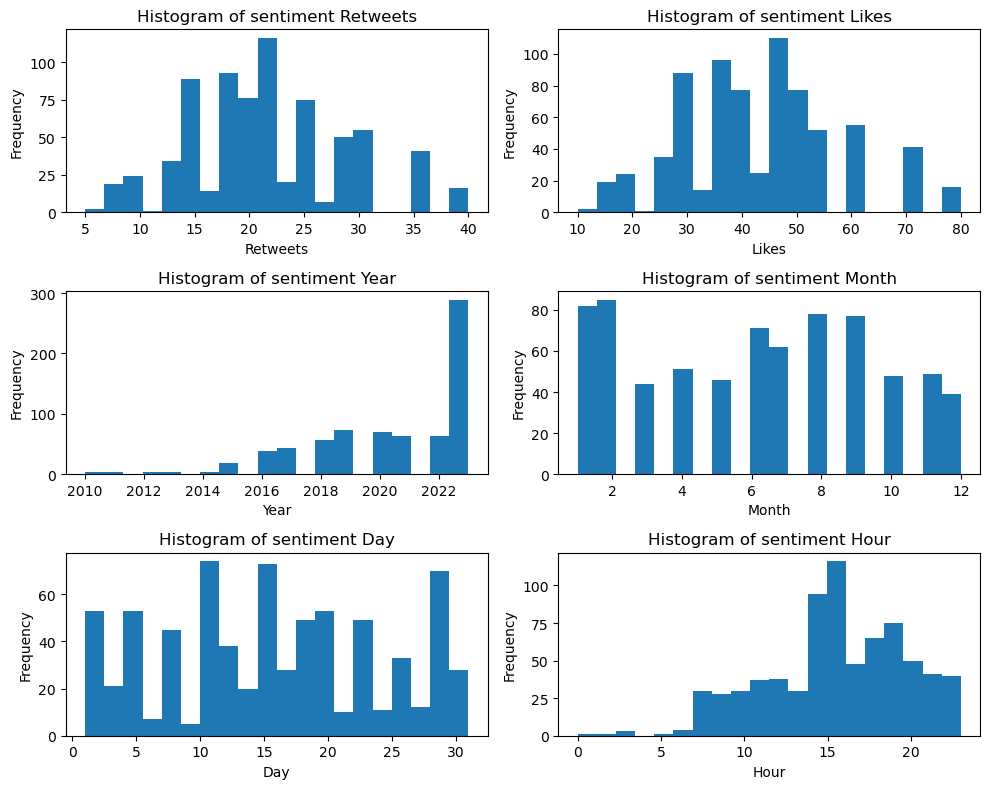

In [74]:
fig, ax = plt.subplots(3,2, figsize=(10,8))
column = ["Retweets", "Likes", "Year", "Month", "Day", "Hour"]

row = 0
col_index = 0

for col in column :
    ax[row, col_index].hist(df[col], bins = 20)
    ax[row, col_index].set_title(f"Histogram of sentiment {col}")
    ax[row, col_index].set_xlabel(col)
    ax[row, col_index].set_ylabel("Frequency")

    col_index += 1
    if col_index == 2:
        col_index = 0
        row += 1

plt.tight_layout()
plt.show() 

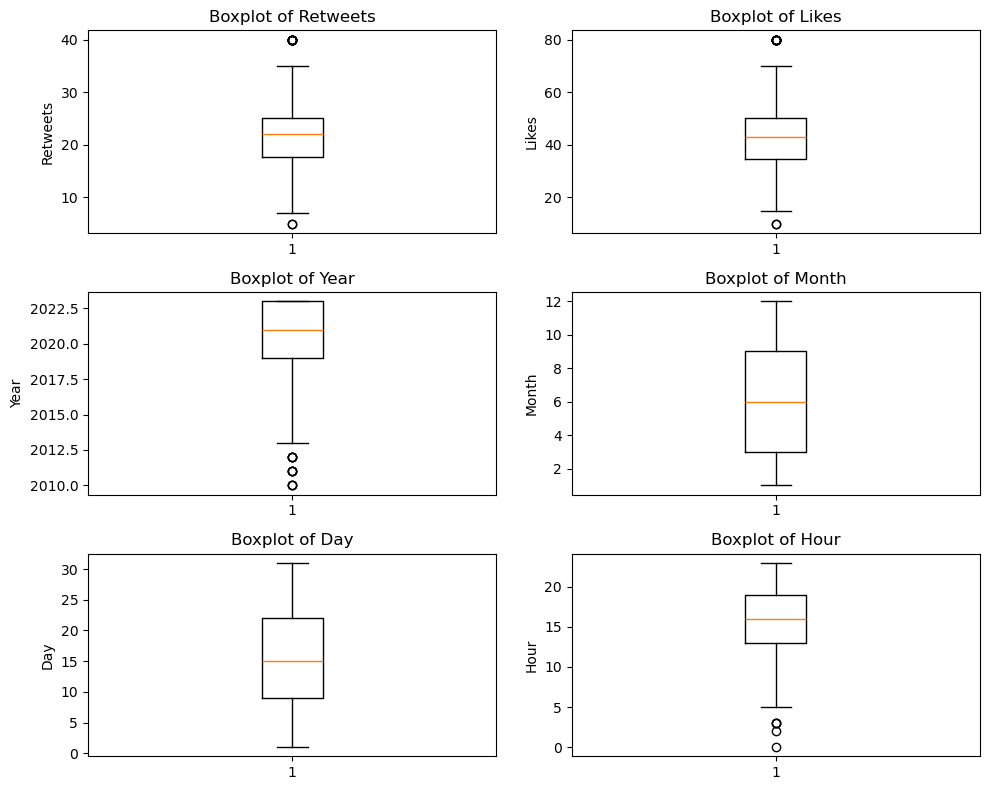

In [72]:
fig, ax = plt.subplots(3, 2, figsize=(10,8))
column = ["Retweets", "Likes", "Year", "Month", "Day", "Hour"]

row = 0
col_index = 0

for col in column:
    ax[row, col_index].boxplot(df[col])
    ax[row, col_index].set_title(f"Boxplot of {col}")
    ax[row, col_index].set_ylabel(col)

    col_index += 1
    if col_index == 2:
        col_index = 0
        row += 1

plt.tight_layout()
plt.show()

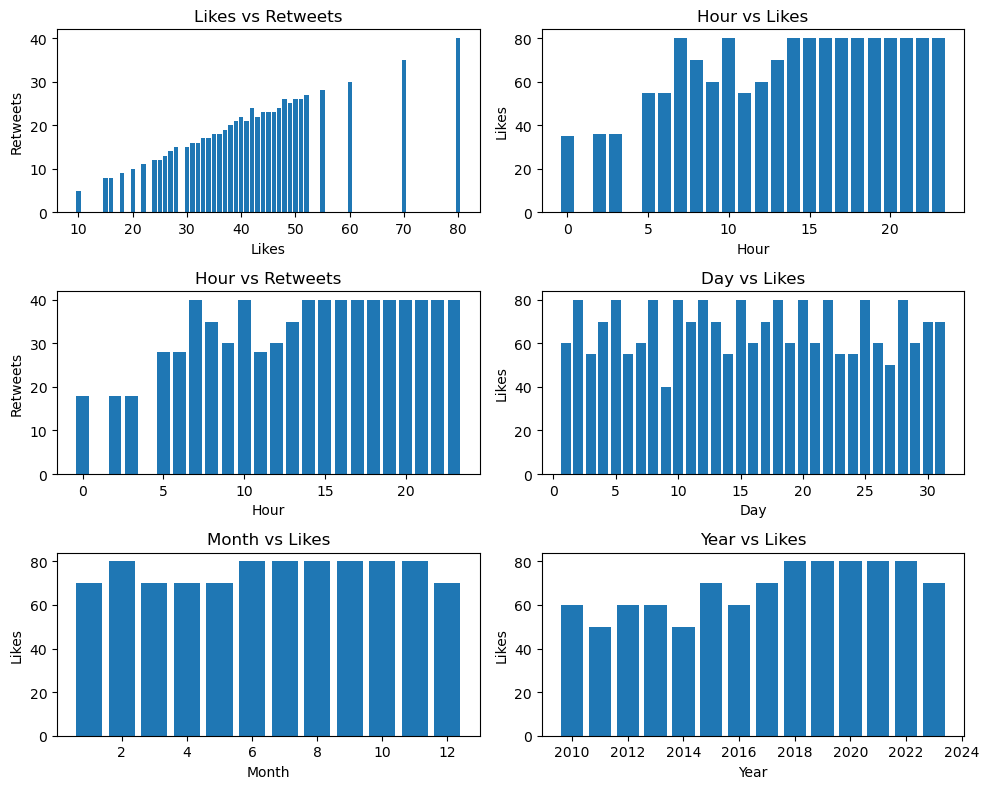

In [56]:
fig, ax = plt.subplots(3, 2, figsize=(10, 8))
column = ["Retweets", "Likes", "Year", "Month", "Day", "Hour"]
pairs = [
    ("Likes", "Retweets"),
    ("Hour", "Likes"),
    ("Hour", "Retweets"),
    ("Day", "Likes"),
    ("Month", "Likes"),
    ("Year", "Likes")
]

row = 0 
col_index = 0
for i, (x, y) in enumerate(pairs):
    ax[row, col_index].bar(df[x], df[y])
    ax[row, col_index].set_xlabel(x)
    ax[row, col_index].set_ylabel(y)
    ax[row, col_index].set_title(f"{x} vs {y}")

    col_index += 1
    if col_index == 2:
        col_index = 0
        row += 1

plt.tight_layout()
plt.show()

In [35]:
column = ["Unnamed: 0.1", "Unnamed: 0", "Retweets", "Likes", "Year", "Month", "Day", "Hour"]
corr_matrix = df[column].corr()
print(corr_matrix)

              Unnamed: 0.1  Unnamed: 0  Retweets     Likes      Year  \
Unnamed: 0.1      1.000000    0.999995  0.388637  0.376208  0.101578   
Unnamed: 0        0.999995    1.000000  0.388884  0.376472  0.100749   
Retweets          0.388637    0.388884  1.000000  0.998482 -0.039982   
Likes             0.376208    0.376472  0.998482  1.000000 -0.043415   
Year              0.101578    0.100749 -0.039982 -0.043415  1.000000   
Month             0.443013    0.443523  0.073265  0.066643 -0.314845   
Day              -0.080101   -0.080480  0.009213  0.011489  0.021973   
Hour              0.322371    0.322163  0.196955  0.195331 -0.087470   

                 Month       Day      Hour  
Unnamed: 0.1  0.443013 -0.080101  0.322371  
Unnamed: 0    0.443523 -0.080480  0.322163  
Retweets      0.073265  0.009213  0.196955  
Likes         0.066643  0.011489  0.195331  
Year         -0.314845  0.021973 -0.087470  
Month         1.000000 -0.135873  0.137835  
Day          -0.135873  1.000000  0.

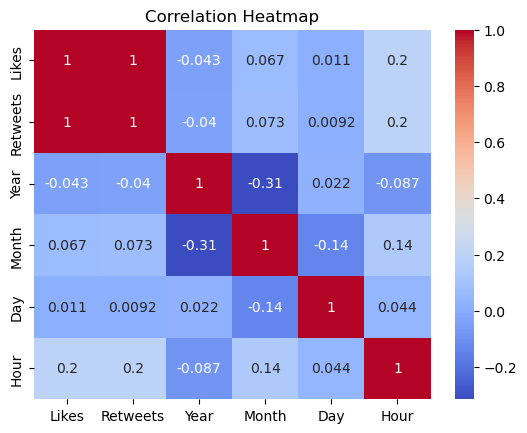

In [70]:
import seaborn as sns

numeric_cols = ["Likes", "Retweets", "Year", "Month", "Day", "Hour"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

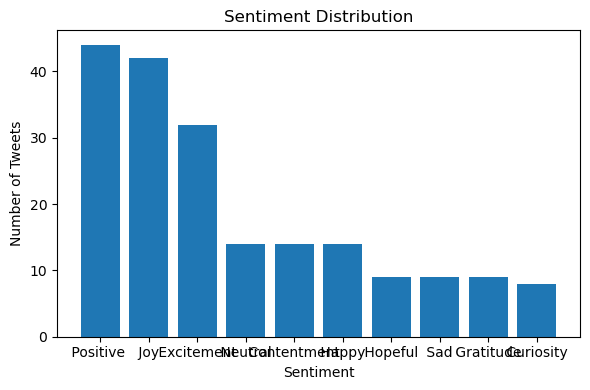

In [68]:
import matplotlib.pyplot as plt

sentiment_counts = df["Sentiment"].value_counts().head(10)

short_labels = sentiment_counts.index.str.slice(0, 5) + "..."

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Top Sentiment Distribution")
plt.tight_layout()

plt.savefig("sentiment_distribution.png", dpi=300)
plt.show()

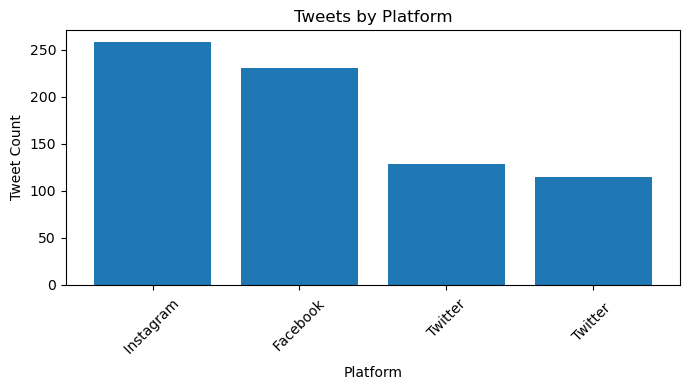

In [46]:
platform_counts = df["Platform"].value_counts()

plt.figure(figsize=(7,4))
plt.bar(platform_counts.index, platform_counts.values)
plt.xlabel("Platform")
plt.ylabel("Tweet Count")
plt.title("Tweets by Platform")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("platform_tweets.png", dpi=300)
plt.show()


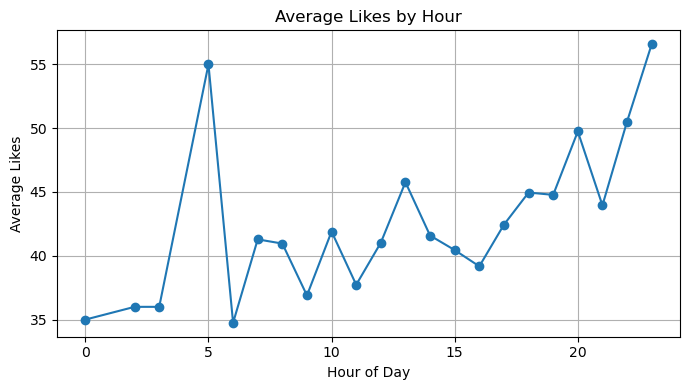

In [48]:
likes_by_hour = df.groupby("Hour")["Likes"].mean()

plt.figure(figsize=(7,4))
plt.plot(likes_by_hour.index, likes_by_hour.values, marker='o')
plt.xlabel("Hour of Day")
plt.ylabel("Average Likes")
plt.title("Average Likes by Hour")
plt.grid(True)
plt.tight_layout()

plt.savefig("likes_by_hour.png", dpi=300)
plt.show()

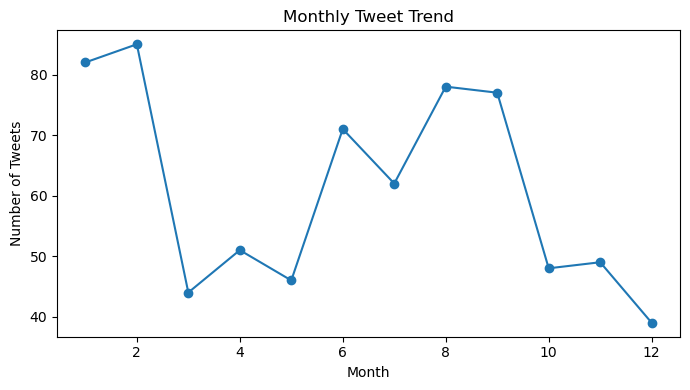

In [54]:
tweets_by_month = df.groupby("Month").size()

plt.figure(figsize=(7,4))
plt.plot(tweets_by_month.index, tweets_by_month.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.title("Monthly Tweet Trend")
plt.tight_layout()

plt.savefig("tweets_by_month.png", dpi=300)
plt.show()


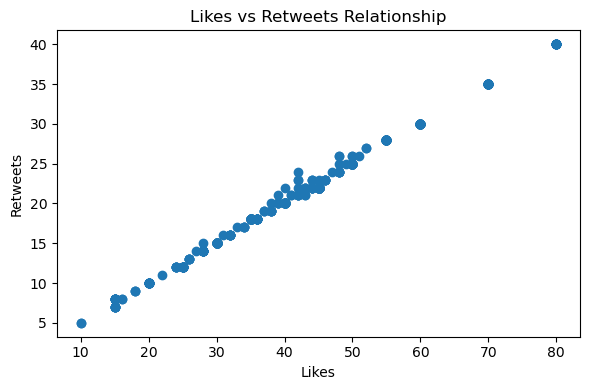

In [58]:
plt.figure(figsize=(6,4))
plt.scatter(df["Likes"], df["Retweets"])
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.title("Likes vs Retweets Relationship")
plt.tight_layout()

plt.savefig("likes_vs_retweets.png", dpi=300)
plt.show()


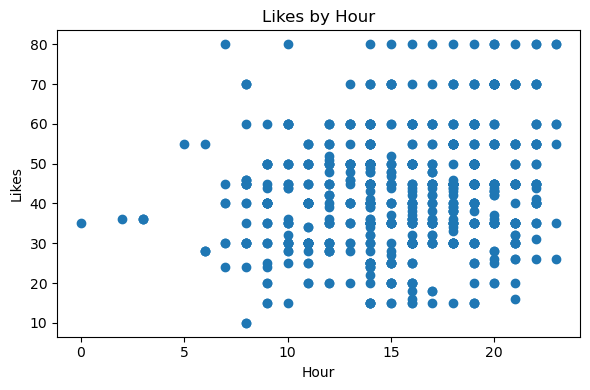

In [60]:
plt.figure(figsize=(6,4))
plt.scatter(df["Hour"], df["Likes"])
plt.xlabel("Hour")
plt.ylabel("Likes")
plt.title("Likes by Hour")
plt.tight_layout()

plt.savefig("likes_by_hour_scatter.png", dpi=300)
plt.show()


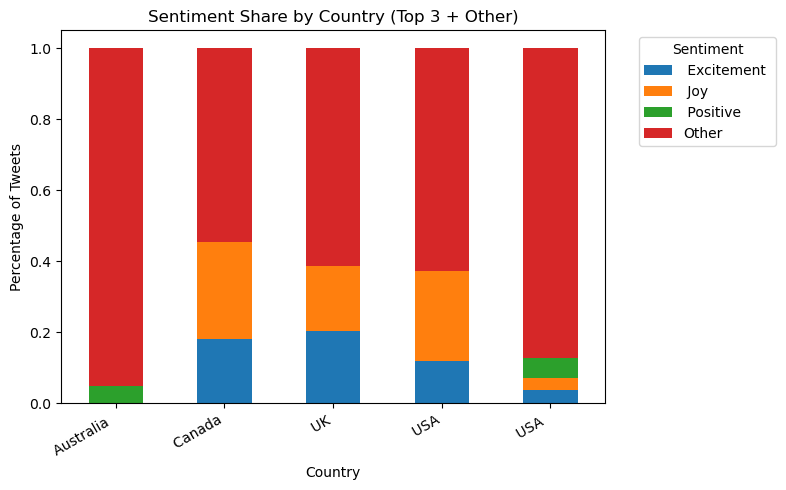

In [84]:
top_countries = df["Country"].value_counts().head(5).index

top_sentiments = df["Sentiment"].value_counts().head(3).index

df["Sentiment_Clean"] = df["Sentiment"].where(
    df["Sentiment"].isin(top_sentiments),
    "Other"
)

country_sentiment = (
    df[df["Country"].isin(top_countries)]
    .groupby(["Country", "Sentiment_Clean"])
    .size()
    .unstack(fill_value=0)
)

country_sentiment_pct = country_sentiment.div(
    country_sentiment.sum(axis=1), axis=0
)

country_sentiment_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5)
)

plt.xlabel("Country")
plt.ylabel("Percentage of Tweets")
plt.title("Sentiment Share by Country (Top 3 + Other)")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=30, ha="right")
plt.tight_layout()

plt.savefig(
    "sentiment_share_by_country.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


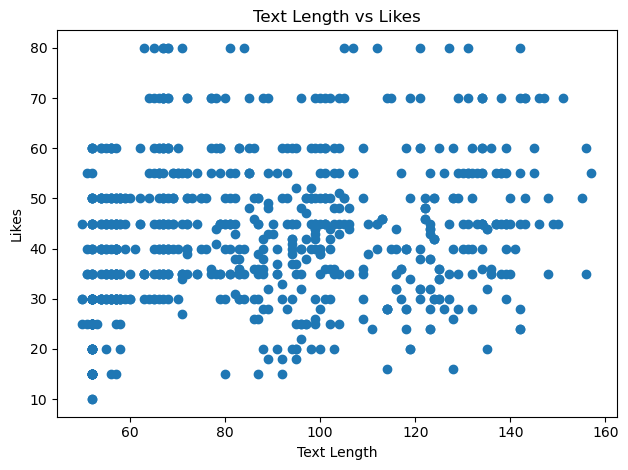

In [86]:
df["Text_Length"] = df["Text"].str.len()

plt.scatter(df["Text_Length"], df["Likes"])
plt.xlabel("Text Length")
plt.ylabel("Likes")
plt.title("Text Length vs Likes")
plt.tight_layout()
plt.show()


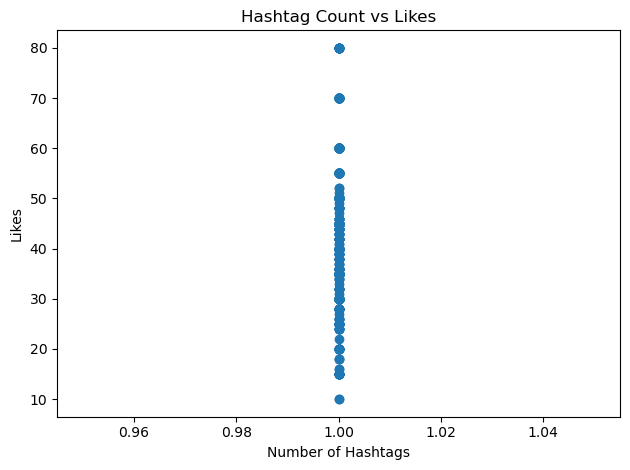

In [88]:
df["Hashtag_Count"] = df["Hashtags"].apply(
    lambda x: len(x.split(",")) if pd.notnull(x) else 0
)

plt.scatter(df["Hashtag_Count"], df["Likes"])
plt.xlabel("Number of Hashtags")
plt.ylabel("Likes")
plt.title("Hashtag Count vs Likes")
plt.tight_layout()
plt.show()


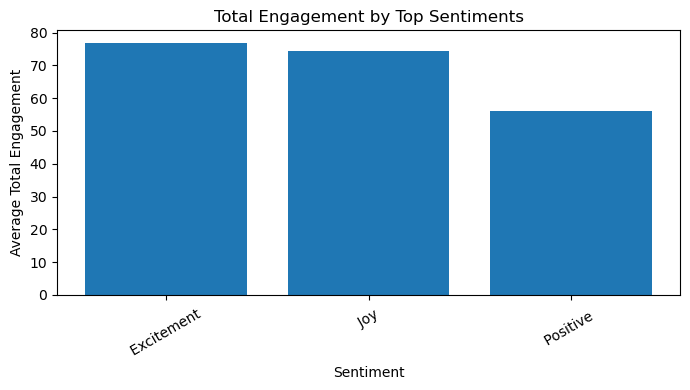

In [100]:
filtered_df["Total_Engagement"] = filtered_df["Likes"] + filtered_df["Retweets"]

total_eng = filtered_df.groupby("Sentiment")["Total_Engagement"].mean()

plt.figure(figsize=(7,4))
plt.bar(total_eng.index, total_eng.values)
plt.xlabel("Sentiment")
plt.ylabel("Average Total Engagement")
plt.title("Total Engagement by Top Sentiments")
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("total_engagement_by_sentiment.png", dpi=300)
plt.show()


# Regreesion Analysis

In [103]:
y = df["Likes"]

In [105]:
X = df[["Retweets", "Hour", "Day", "Month"]]

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [109]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients

,Feature,Coefficient
0,Retweets,1.991984
1,Hour,-0.000419
2,Day,0.001534
3,Month,-0.023508


In [113]:
y_pred = model.predict(X_test)

## R-squared

In [116]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.9979508540212767

## Mean Squared Error

In [119]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

0.4207695433574707

## Actual vs Predicted plot

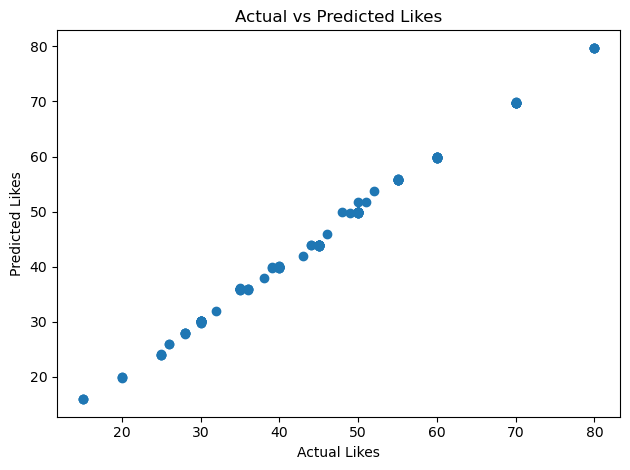

In [122]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Actual vs Predicted Likes")
plt.tight_layout()
plt.show()

# Time Series Analysis

In [125]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df = df.sort_values("Timestamp")
df.set_index("Timestamp", inplace=True)

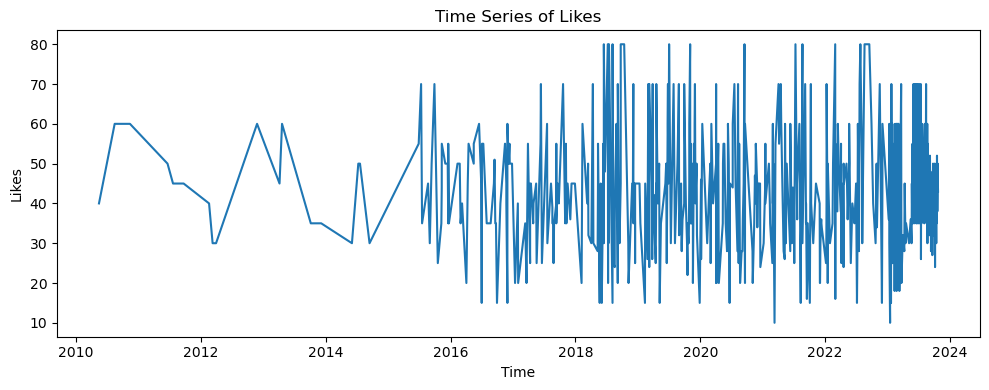

In [127]:
plt.figure(figsize=(10,4))
plt.plot(df["Likes"])
plt.xlabel("Time")
plt.ylabel("Likes")
plt.title("Time Series of Likes")
plt.tight_layout()
plt.show()

In [145]:
daily_likes = df["Likes"].resample("D").mean()
daily_likes = daily_likes.fillna(0)

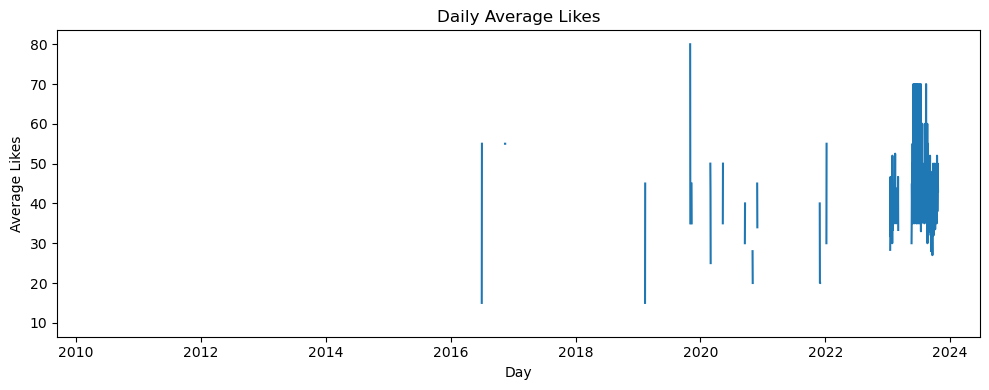

In [137]:
plt.figure(figsize=(10,4))
plt.plot(daily_likes)
plt.xlabel("Day")
plt.ylabel("Average Likes")
plt.title("Daily Average Likes")
plt.tight_layout()
plt.show()

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_likes, model="additive", period=7)

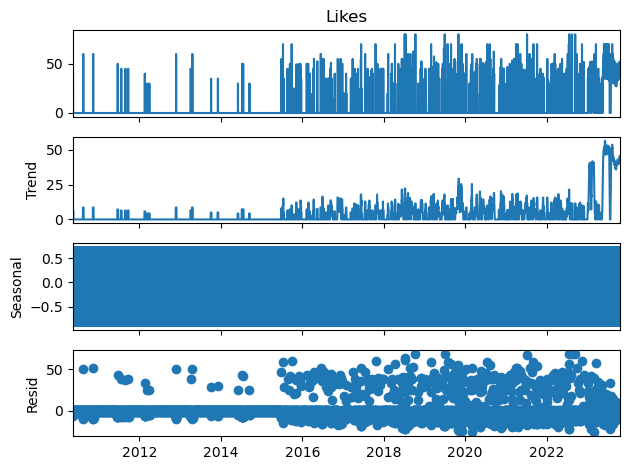

In [149]:
decomposition.plot()
plt.tight_layout()
plt.show()

In [151]:
rolling_7 = daily_likes.rolling(window=7).mean()

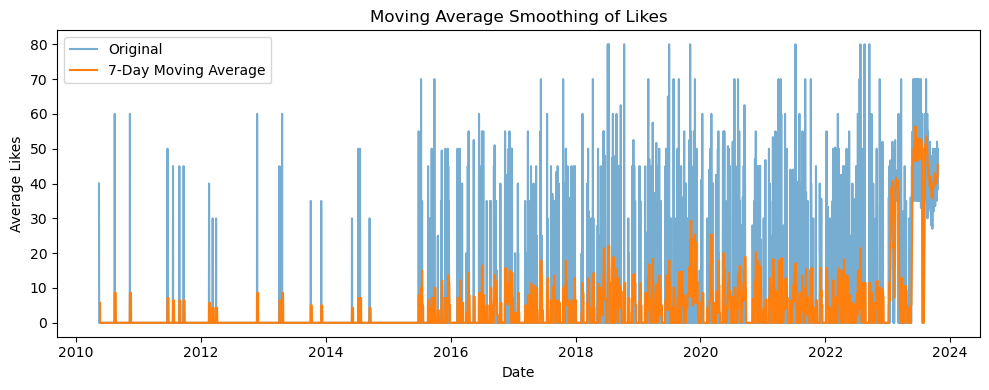

In [153]:
plt.figure(figsize=(10,4))
plt.plot(daily_likes, label="Original", alpha=0.6)
plt.plot(rolling_7, label="7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Average Likes")
plt.title("Moving Average Smoothing of Likes")
plt.legend()
plt.tight_layout()
plt.show()

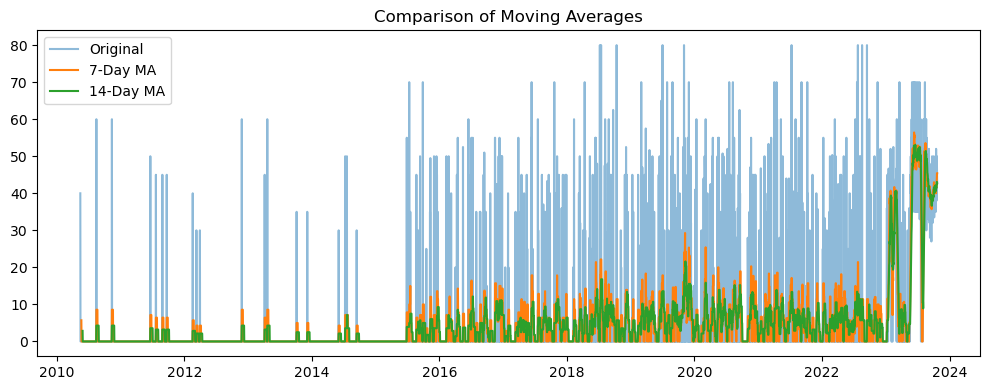

In [155]:
rolling_14 = daily_likes.rolling(window=14).mean()

plt.figure(figsize=(10,4))
plt.plot(daily_likes, label="Original", alpha=0.5)
plt.plot(rolling_7, label="7-Day MA")
plt.plot(rolling_14, label="14-Day MA")
plt.legend()
plt.title("Comparison of Moving Averages")
plt.tight_layout()
plt.show()

# Clustering Analysis

In [160]:
features = df[["Likes", "Retweets", "Hour", "Day", "Month"]]

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [164]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

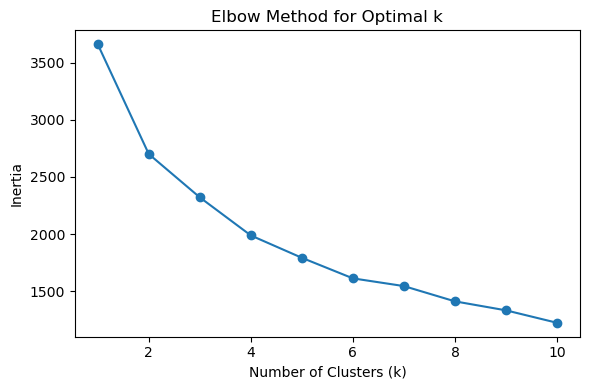

In [166]:
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.tight_layout()
plt.show()

## Apply K-Means Clustering

In [169]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df["Cluster"] = clusters

In [171]:
df.groupby("Cluster")[["Likes", "Retweets", "Hour", "Day", "Month"]].mean()

,Likes,Retweets,Hour,Day,Month
Cluster,,,,,
0,39.291188,19.670498,16.053640,23.103448,4.869732
1,57.405858,28.786611,17.138075,13.092050,7.163180
2,32.021552,16.077586,13.258621,9.418103,6.461207


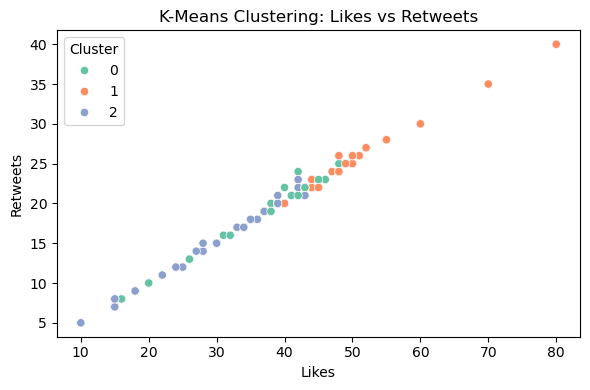

In [173]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Likes"],
    y=df["Retweets"],
    hue=df["Cluster"],
    palette="Set2"
)
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.title("K-Means Clustering: Likes vs Retweets")
plt.tight_layout()
plt.show()

In [175]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

df["PCA1"] = pca_features[:, 0]
df["PCA2"] = pca_features[:, 1]

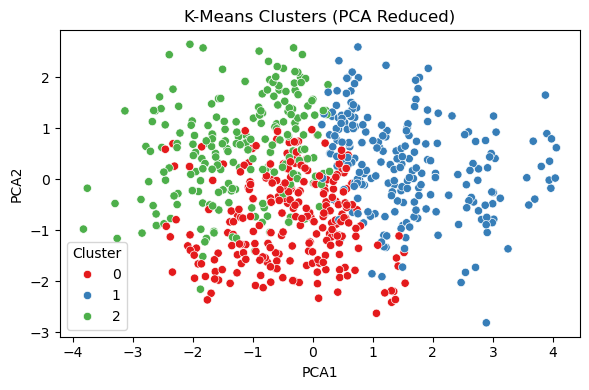

In [177]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["PCA1"],
    y=df["PCA2"],
    hue=df["Cluster"],
    palette="Set1"
)
plt.title("K-Means Clusters (PCA Reduced)")
plt.tight_layout()
plt.show()

# Predictive Modeling

In [15]:
y = df["Sentiment"]

In [17]:
X = df[[
    "Platform", "Country",
    "Likes", "Retweets",
    "Hour", "Day", "Month"
]]

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
categorical_cols = ["Platform", "Country"]
numeric_cols = ["Likes", "Retweets", "Hour", "Day", "Month"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

## A. Logistic Regression

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Country']),
                                                 ('num', 'passthrough',
                                                  ['Likes', 'Retweets', 'Hour',
                                                   'Day', 'Month'])])),
                ('model', LogisticRegression(max_iter=1000))])

### B. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Country']),
                                                 ('num', 'passthrough',
                                                  ['Likes', 'Retweets', 'Hour',
                                                   'Day', 'Month'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

## C. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Country']),
                                                 ('num', 'passthrough',
                                                  ['Likes', 'Retweets', 'Hour',
                                                   'Day', 'Month'])])),
                ('model', RandomForestClassifier(random_state=42))])

## Model Evaluation

In [35]:
from sklearn.metrics import classification_report, accuracy_score

In [37]:
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr, zero_division=0))

Logistic Regression
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
           Admiration        0.00      0.00      0.00         1
         Admiration          0.00      0.00      0.00         0
        Admiration           0.00      0.00      0.00         1
            Adventure        0.00      0.00      0.00         0
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
         Anticipation        0.00      0.00      0.00         0
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  B

In [241]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print(classification_report(y_test, y_pred_dt, zero_division=0))

Decision Tree
                     precision    recall  f1-score   support

      Acceptance          0.00      0.00      0.00         0
   Acceptance             1.00      0.33      0.50         3
    Accomplishment        0.00      0.00      0.00         0
        Admiration        0.00      0.00      0.00         0
      Admiration          0.00      0.00      0.00         0
     Admiration           0.00      0.00      0.00         1
      Adoration           0.00      0.00      0.00         1
    Adrenaline            0.00      0.00      0.00         0
         Adventure        0.00      0.00      0.00         0
       Ambivalence        0.00      0.00      0.00         0
   Ambivalence            0.00      0.00      0.00         1
      Anticipation        0.00      0.00      0.00         0
     Anticipation         0.00      0.00      0.00         1
         Anxiety          0.00      0.00      0.00         1
      Apprehensive        0.00      0.00      0.00         0
     Arou

In [39]:
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Random Forest
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
       Accomplishment        0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
         Admiration          0.00      0.00      0.00         0
        Admiration           0.00      0.00      0.00         1
         Affection           1.00      1.00      1.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               1.00      1.00      1.00         1
        Anticipation         0.00      0.00      0.00         1
            Anxiety          0.00      0.00      0.00         0
        Arousal              0.00      0.00      0.00         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
         Awe             

## Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

In [45]:
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Platform',
                                                                          'Country']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['Likes',
                                                                          'Retweets',
                                                                          'Hour',
                                                                          'Day',
                                                                          'Month'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='f1_weighted')

In [46]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [47]:
y_pred_best = best_model.predict(X_test)

print("Tuned Random Forest")
print(classification_report(y_test, y_pred_best, zero_division=0))

Tuned Random Forest
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
           Admiration        0.00      0.00      0.00         1
         Admiration          0.00      0.00      0.00         0
        Admiration           0.00      0.00      0.00         1
         Adoration           0.00      0.00      0.00         0
         Affection           1.00      1.00      1.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               1.00      1.00      1.00         1
        Anticipation         0.00      0.00      0.00         1
            Anxiety          0.00      0.00      0.00         0
        Arousal              0.00      0.00      0.00         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  B

In [249]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

results

,Model,Accuracy
0,Logistic Regression,0.136054
1,Decision Tree,0.197279
2,Random Forest,0.217687


# Natural Language Processing

In [9]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

In [13]:
nltk.download("punkt", quiet= True)
nltk.download("stopwords", quiet= True)
nltk.download("wordnet", quiet=True)
nltk.download("omw-1.4", quiet= True)

True

## A. Lowercasing & Cleaning

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)       
    text = re.sub(r"[^a-z\s]", "", text)     
    return text

In [17]:
df["clean_text"] = df["Text"].apply(clean_text)

## B. Tokenization

In [19]:
df["tokens"] = df["clean_text"].apply(word_tokenize)

## C. Remove Stopwords

In [21]:
stop_words = set(stopwords.words("english"))

df["tokens"] = df["tokens"].apply(
    lambda x: [word for word in x if word not in stop_words]
)

## D. Lemmatization

In [23]:
lemmatizer = WordNetLemmatizer()

df["lemmatized"] = df["tokens"].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)

## Sentiment Analysis using TextBlob

In [25]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [27]:
df["polarity"] = df["clean_text"].apply(get_sentiment)

In [29]:
def sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

In [31]:
df["sentiment"] = df["polarity"].apply(sentiment_label)

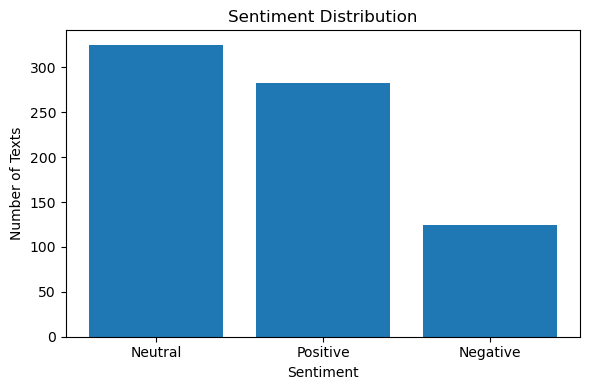

In [33]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Number of Texts")
plt.title("Sentiment Distribution")
plt.tight_layout()
plt.show()

## Word Cloud Visualization

In [37]:
all_words = " ".join(df["clean_text"])

In [39]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stop_words
).generate(all_words)

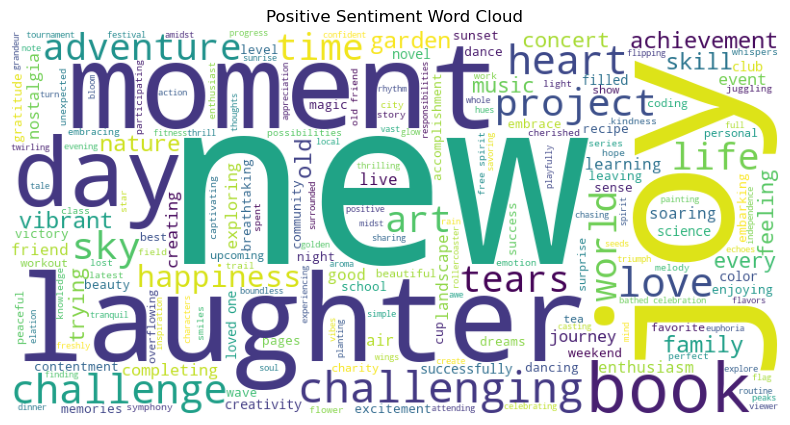

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(
    df[df["sentiment"] == "Positive"]["clean_text"]
    .dropna()
    .astype(str)
)

wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
)

wc.generate(positive_text)

img = wc.to_image()  

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()


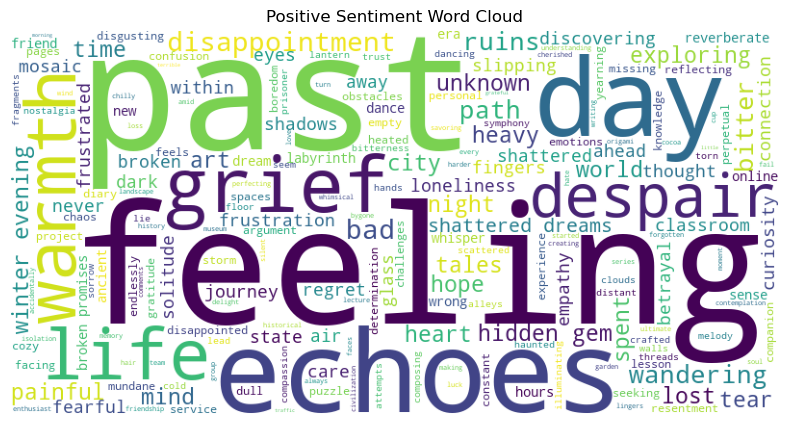

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(
    df[df["sentiment"] == "Negative"]["clean_text"]
    .dropna()
    .astype(str)
)

wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
)

wc.generate(positive_text)

img = wc.to_image()  

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()


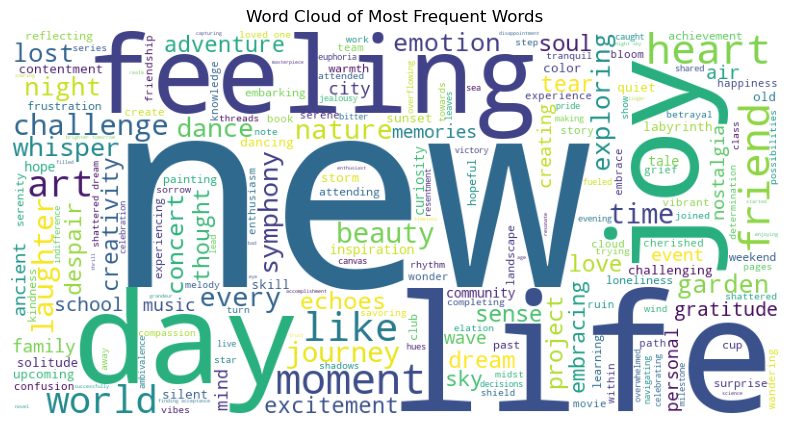

In [51]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud.to_image()) 
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words")
plt.show()